In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
smile = pd.read_csv('../data/smile.csv')
smile.head()

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,StateProvince,...,Is_the_treatment_plan_completed,Was_a_treatment_plan_developed,What_car_ was_provided_to_the_enrollee,Dental_Insurance,Do_they_pre_qualify_for_SMILE_ON_60+,What_is_the_next_step_for_clients_encounter,What_is_the_next_step_for_clients_encounter.1,Number_of_Lower_Natural_Teeth,Enroller_ID,Enroller_Location
0,81381827,SMILE ON 60+ Registration,11/25/2020 16:46,11/25/2020 16:48,2,3859874,136529,Springfield,Robertson,TN,...,NaN,NaN,NaN,No,Yes,Continued with Navigation,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site
1,81381479,SMILE ON 60+ Registration,11/23/2020 16:36,11/23/2020 16:39,3,3859856,136529,Nashville,Davidson,TN,...,NaN,NaN,NaN,No,Yes,Continued with Navigation,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site
2,81289447,SMILE ON 60+ Registration,11/23/2020 14:24,11/23/2020 14:26,2,3853796,141066,Memphis,Shelby,TN,...,NaN,NaN,NaN,No,Yes,Continued with Navigation,NaN,NaN,Church Health Center - Memphis,Provider Site
3,81280597,SMILE ON 60+ Registration,11/23/2020 12:02,11/23/2020 12:18,16,3853155,119513,Johnson City,Washington,TN,...,NaN,NaN,NaN,No,Yes,Continued with Navigation,NaN,NaN,Northeast Tennessee Community Health Centers I...,Provider Site
4,81270356,SMILE ON 60+ Registration,11/23/2020 9:02,11/23/2020 9:07,5,3852084,134393,Clarksville,Montgomery,TN,...,NaN,NaN,NaN,No,Yes,Continued with Navigation,NaN,NaN,Matthew Walker - Clarksville,Provider Site


In [3]:
smile.count()

CallReportNum                                                       40032
ReportVersion                                                       40032
CallDateAndTimeStart                                                40032
CallDateAndTimeEnd                                                  40032
CallLength                                                          40032
CallerNum                                                           40032
PhoneWorkerNum                                                      40032
CityName                                                            39404
CountyName                                                          39685
StateProvince                                                       40025
CountryName                                                         39687
PostalCode                                                          37392
Narrative                                                            5320
EnteredByWorkerNum                    

In [4]:
smile.PostalCode.value_counts()

37130.0    1119
37013.0     966
37207.0     934
37211.0     787
37115.0     751
           ... 
37409.0       1
37406.0       1
37370.0       1
37320.0       1
30741.0       1
Name: PostalCode, Length: 479, dtype: int64

In [5]:
smile['Enroller_Location'].unique()

array(['Provider Site', nan, 'Health Assist Office', 'Senior Center',
       'Tooth Wisdom', 'Outreach'], dtype=object)

In [6]:
smile.PostalCode.value_counts()

37130.0    1119
37013.0     966
37207.0     934
37211.0     787
37115.0     751
           ... 
37409.0       1
37406.0       1
37370.0       1
37320.0       1
30741.0       1
Name: PostalCode, Length: 479, dtype: int64

In [7]:
smile.Household_Income_Level.value_counts()

$0 - $21 280     28983
$21246-$24280     5220
$24281-$27315     1600
$28806-$32920     1439
$32921-$37035      429
$36366-$41560      191
$41561-$46755      151
$50201-$56475       42
$43926-$50200       40
$51486-$58840       13
$76121-$85635       12
$59046-$67480       11
$58841-$66195        9
$66606-$76120        3
$84761-$95355        3
$67481-$75915        2
Name: Household_Income_Level, dtype: int64

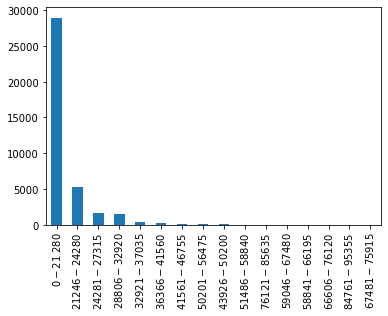

In [8]:
smile.Household_Income_Level.value_counts().plot.bar()

In [9]:
smile.barriers_for_finding_consistent_dental_home.value_counts()

Dental cost; No insurance                                                                            14479
Dental cost                                                                                          10497
No insurance                                                                                          2956
Transportation; Dental cost; No insurance                                                             1213
Transportation; Dental cost                                                                            952
Dental cost; No insurance; Fear                                                                        812
Dental cost; Fear                                                                                      614
Dental cost; No insurance; Physical mobility and health                                                453
Dental cost; Physical mobility and health                                                              386
Transportation                       

In [10]:
type_counts=smile.CallerNum.sort_values()
type_counts.head()

34457   -2
30438   -2
8516    -2
31640   -2
14337   -2
Name: CallerNum, dtype: int64

In [11]:
type_counts = type_counts.reset_index()
type_counts

,index,CallerNum
0,34457,-2
1,30438,-2
2,8516,-2
3,31640,-2
4,14337,-2
...,...,...
40027,2687,3859831
40028,2986,3859848
40029,1,3859856
40030,2982,3859863


In [12]:
type_counts.columns = ['CallerNum', 'count']
type_counts.head(3)

,CallerNum,count
0,34457,-2
1,30438,-2
2,8516,-2


In [13]:
type_counts.sort_values(by = 'count', ascending = False)

,CallerNum,count
40031,0,3859874
40030,2982,3859863
40029,1,3859856
40028,2986,3859848
40027,2687,3859831
...,...,...
6,5691,-2
7,6468,-2
8,31014,-2
9,14855,-2


In [14]:
smile.CallReportNum.value_counts()

69872484    1
69733739    1
79822197    1
73528692    1
74632563    1
           ..
66885796    1
68512472    1
69141205    1
77711441    1
62849024    1
Name: CallReportNum, Length: 40032, dtype: int64

In [15]:
type_counts.sort_values(by = 'count', ascending = False)

,CallerNum,count
40031,0,3859874
40030,2982,3859863
40029,1,3859856
40028,2986,3859848
40027,2687,3859831
...,...,...
6,5691,-2
7,6468,-2
8,31014,-2
9,14855,-2


In [16]:
smile.isna().sum()

CallReportNum                                                           0
ReportVersion                                                           0
CallDateAndTimeStart                                                    0
CallDateAndTimeEnd                                                      0
CallLength                                                              0
CallerNum                                                               0
PhoneWorkerNum                                                          0
CityName                                                              628
CountyName                                                            347
StateProvince                                                           7
CountryName                                                           345
PostalCode                                                           2640
Narrative                                                           34712
EnteredByWorkerNum                    

In [17]:
smile.dropna(axis='index',subset=['PostalCode'],inplace=True)

In [18]:
len(smile['PostalCode'].unique())

479

In [19]:
zipcodes=pd.DataFrame()

In [20]:

smile['PostalCode']=smile['PostalCode'].astype(int) #to convert any data type

In [21]:
smile['PostalCode'].dtypes

dtype('int32')

In [22]:
zipcodes['Name']=smile['PostalCode'].unique()

In [23]:
zipcodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Name    479 non-null    int32
dtypes: int32(1)
memory usage: 2.0 KB


In [24]:
!pip install geopy

In [25]:
from geopy.geocoders import Nominatim

In [26]:
geolocator=Nominatim(user_agent='app')

In [27]:
lat=[]
lon=[]
for PostalCode in zipcodes['Name']:
    PostalCode=geolocator.geocode(PostalCode)
    if PostalCode is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(PostalCode.latitude)
        lon.append(PostalCode.longitude)
        


In [28]:
print(lat,lon)

[36.5070515, 36.1919766, 35.84836413832144, 36.349474799999996, 36.5562925, 41.0884719, 35.1320489, 35.1929135, 45.1557045711993, 52.3033089, 44.9766803, 45.1788433, 36.136192393729964, 51.33589815, 36.0046420492625, 35.3607953, 48.90114544654547, 35.0847836, 36.033811817299544, 35.1977704, 46.21387032164197, 35.22270971261366, 28.4389661, 35.11562283224808, 35.1156879, 35.1208432, 48.95911796684493, 49.003861989629634, 48.96019492993491, 28.4013608, 36.1775873, 36.40475556222848, 36.03177581078069, 45.5226884, 36.09860775, 35.0076179, 40.5104064, 35.99291319240362, 35.808814669640995, 35.1450266, 35.71785576845994, 35.0453268, 36.3448703, 36.53867395, 35.447468613688, 36.0452344, 45.4594325, 28.44276515, 36.591844, 48.93320001582219, 52.21187685, 36.04087317076563, 36.02970195287453, 36.1283217, 36.07130885209599, 36.5075757, 35.206276837587204, 49.00616961818182, 35.0625066, 36.03817498926674, 45.50760803127412, 36.00281730888268, 36.032171418932734, 36.022214334896056, 52.3108256, 3

In [29]:
zipcodes['lat']=lat
zipcodes['lon']=lon

In [30]:
zipcodes.head()

,Name,lat,lon
0,37172,36.507052,-86.741459
1,37208,36.191977,-86.809868
2,38111,35.848364,129.227713
3,37601,36.349475,-82.333395
4,37042,36.556292,-87.424759


In [31]:
zip_counts=smile.PostalCode.value_counts().reset_index()

In [32]:
zip_counts.columns=['Name','count']

In [33]:
zip_counts

,Name,count
0,37130,1119
1,37013,966
2,37207,934
3,37211,787
4,37115,751
...,...,...
474,38369,1
475,37409,1
476,37843,1
477,38339,1


In [34]:
zip_codes=zip_counts.merge(zipcodes,on='Name',how='left').dropna()

In [35]:
zip_codes.head()

,Name,count,lat,lon
0,37130,1119,47.337043,0.374548
1,37013,966,36.045234,-86.663858
2,37207,934,36.232787,-86.750344
3,37211,787,36.051359,-86.719891
4,37115,751,41.088472,-5.889673


In [36]:
!pip install folium

In [37]:
def generatebasemap(default_location=[36.507052,-86.741459],default_zoom_start=12):
    basemap=folium.Map(location=default_location,zoom_start=default_zoom_start)
    return basemap

In [38]:
import folium
basemap=generatebasemap()
basemap

In [39]:
from folium.plugins import HeatMap

In [40]:
HeatMap(zip_codes[['lat','lon','count']],zoom=20).add_to(basemap)

In [41]:
basemap

In [42]:
from folium.plugins import FastMarkerCluster

In [43]:
FastMarkerCluster(zip_codes[['lat','lon','count']],zoom=20).add_to(basemap)

In [44]:
basemap

In [45]:
smile.head()

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,StateProvince,...,Is_the_treatment_plan_completed,Was_a_treatment_plan_developed,What_car_ was_provided_to_the_enrollee,Dental_Insurance,Do_they_pre_qualify_for_SMILE_ON_60+,What_is_the_next_step_for_clients_encounter,What_is_the_next_step_for_clients_encounter.1,Number_of_Lower_Natural_Teeth,Enroller_ID,Enroller_Location
0,81381827,SMILE ON 60+ Registration,11/25/2020 16:46,11/25/2020 16:48,2,3859874,136529,Springfield,Robertson,TN,...,NaN,NaN,NaN,No,Yes,Continued with Navigation,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site
1,81381479,SMILE ON 60+ Registration,11/23/2020 16:36,11/23/2020 16:39,3,3859856,136529,Nashville,Davidson,TN,...,NaN,NaN,NaN,No,Yes,Continued with Navigation,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site
2,81289447,SMILE ON 60+ Registration,11/23/2020 14:24,11/23/2020 14:26,2,3853796,141066,Memphis,Shelby,TN,...,NaN,NaN,NaN,No,Yes,Continued with Navigation,NaN,NaN,Church Health Center - Memphis,Provider Site
3,81280597,SMILE ON 60+ Registration,11/23/2020 12:02,11/23/2020 12:18,16,3853155,119513,Johnson City,Washington,TN,...,NaN,NaN,NaN,No,Yes,Continued with Navigation,NaN,NaN,Northeast Tennessee Community Health Centers I...,Provider Site
4,81270356,SMILE ON 60+ Registration,11/23/2020 9:02,11/23/2020 9:07,5,3852084,134393,Clarksville,Montgomery,TN,...,NaN,NaN,NaN,No,Yes,Continued with Navigation,NaN,NaN,Matthew Walker - Clarksville,Provider Site


In [46]:
smile['CallerNum'].unique()

array([3859874, 3859856, 3853796, ..., 2647880, 2647845, 2647345],
      dtype=int64)

In [47]:
len(smile['CallerNum'].unique())

8044

In [48]:
callernums=pd.DataFrame()

In [49]:

smile['PostalCode']=pd.to_numeric(smile['PostalCode'])  #to convert any data type

In [50]:
smile.groupby('PostalCode')['CallerNum'].count().sort_values(ascending=False)

PostalCode
37130    1119
37013     966
37207     934
37211     787
37115     751
         ... 
38222       1
38233       1
38315       1
38334       1
38654       1
Name: CallerNum, Length: 479, dtype: int64

In [51]:
CallerNum_count=smile.groupby('PostalCode')['CallerNum'].count().sort_values(ascending=False).values

In [52]:
PostalCode=smile.groupby('PostalCode')['CallerNum'].count().sort_values(ascending=False).index

In [53]:
count=pd.DataFrame()

In [54]:
lat=[]
lon=[]
for zipcode in PostalCode:
    zipcode=geolocator.geocode(zipcode)
    if zipcode is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(zipcode.latitude)
        lon.append(zipcode.longitude)
        


In [55]:
count['PostalCode']=PostalCode
count['lat']=lat
count['lon']=lon
count['CallerNum_count']=CallerNum_count


In [56]:
count

,PostalCode,lat,lon,CallerNum_count
0,37130,47.337043,0.374548,1119
1,37013,36.045234,-86.663858,966
2,37207,36.232787,-86.750344,934
3,37211,36.051359,-86.719891,787
4,37115,41.088472,-5.889673,751
...,...,...,...,...
474,38222,48.764779,14.176796,1
475,38233,36.192649,-89.022277,1
476,38315,52.025779,10.534340,1
477,38334,35.649005,128.706322,1


In [57]:
population = pd.read_csv('../data/pop_by_zip_clean.csv')
population.head()

,PostalCode,population
0,37013,"97,819"
1,37042,"77,168"
2,37211,"76,834"
3,37075,"65,123"
4,37167,"59,055"


In [58]:
zip_pop=count.merge(population,on='PostalCode',how='left').dropna()
zip_pop.head()

,PostalCode,lat,lon,CallerNum_count,population
0,37130,47.337043,0.374548,1119,"57,071"
1,37013,36.045234,-86.663858,966,"97,819"
2,37207,36.232787,-86.750344,934,"38,583"
3,37211,36.051359,-86.719891,787,"76,834"
4,37115,41.088472,-5.889673,751,"40,484"


In [59]:
zip_pop.to_csv(r'C:\Users\derej\Desktop\python\zip_pop.csv', index = False)

In [60]:
count.isna().sum()    #no na

PostalCode         0
lat                0
lon                0
CallerNum_count    0
dtype: int64

In [61]:
HeatMap(count[['lat','lon','CallerNum_count']]).add_to(basemap)

In [62]:
basemap

In [63]:
from folium.plugins import FastMarkerCluster


In [64]:
FastMarkerCluster(count[['lat','lon','CallerNum_count']]).add_to(basemap)

In [65]:
basemap

In [66]:
smile.PostalCode.value_counts()

37130    1119
37013     966
37207     934
37211     787
37115     751
         ... 
38369       1
37409       1
37843       1
38339       1
38548       1
Name: PostalCode, Length: 479, dtype: int64

In [82]:
z=pd.read_csv('../data/zip_pop.csv')

In [83]:
z.head()

,PostalCode,CallerNum_per_1000pop.
0,37130,19.607156
1,37013,9.875382
2,37207,24.207553
3,37211,10.242861
4,37115,18.550538
